# ADS 502 Final Project
# 
## Heart Failure Detection
# 
### Team 4

In [303]:
import warnings
warnings.filterwarnings('ignore')

In [329]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.tools.tools as stattools
import statsmodels.stats.outliers_influence as inf


from scipy import stats
from sklearn import metrics
from keras.layers import Dense
from keras.models import Sequential
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [187]:
pd.set_option('display.max_columns', None)

In [188]:
url = 'https://raw.githubusercontent.com/dingyiduan7/ADS-502/main/ADS%20502%20Final_Project/heart_failure_clinical_records_dataset.csv'
heart = pd.read_csv(url)
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Exploratory Data Analysis (EDA)

Get a summary of the dataframe

In [189]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


First, check for missing data

In [190]:
heart.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Use skewness of histogram and boxplot to check for outliers

<AxesSubplot:ylabel='Frequency'>

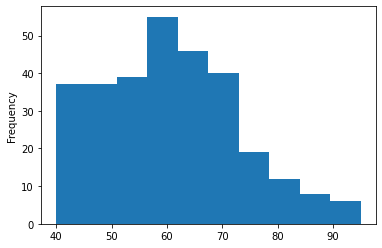

In [191]:
heart['age'].plot.hist()

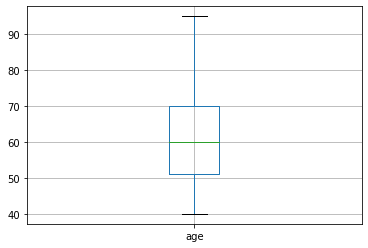

In [192]:
fig = plt.figure()
boxplot = heart.boxplot(column=['age'])

<AxesSubplot:ylabel='Frequency'>

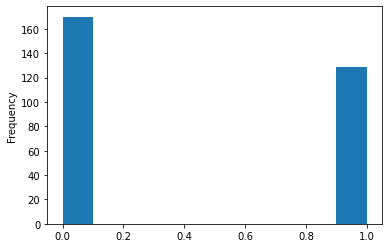

In [193]:
heart['anaemia'].plot.hist()

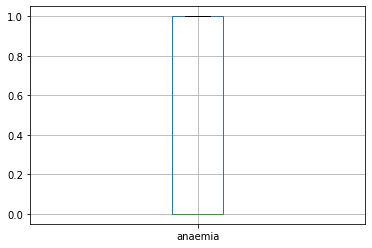

In [194]:
fig = plt.figure()
boxplot = heart.boxplot(column=['anaemia'])

<AxesSubplot:ylabel='Frequency'>

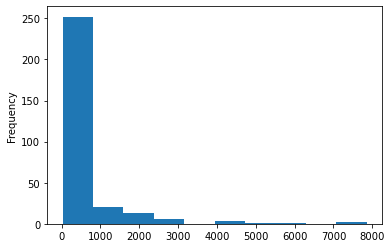

In [195]:
heart['creatinine_phosphokinase'].plot.hist()

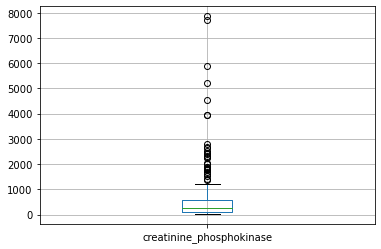

In [196]:
fig = plt.figure()
boxplot = heart.boxplot(column=['creatinine_phosphokinase'])

<AxesSubplot:ylabel='Frequency'>

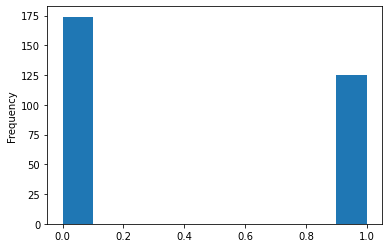

In [197]:
heart['diabetes'].plot.hist()

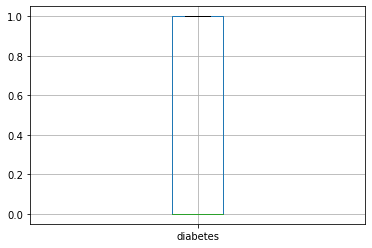

In [198]:
fig = plt.figure()
boxplot = heart.boxplot(column=['diabetes'])

<AxesSubplot:ylabel='Frequency'>

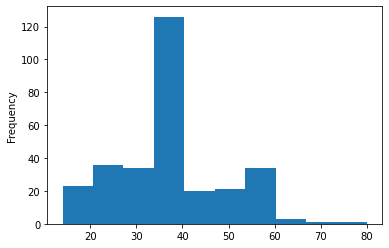

In [199]:
heart['ejection_fraction'].plot.hist()

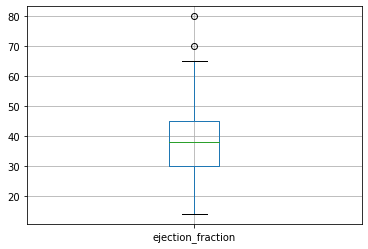

In [200]:
fig = plt.figure()
boxplot = heart.boxplot(column=['ejection_fraction'])

<AxesSubplot:ylabel='Frequency'>

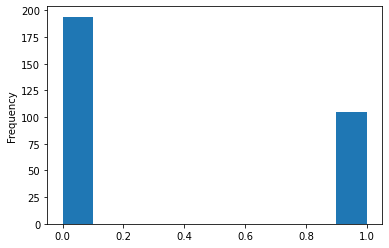

In [201]:
heart['high_blood_pressure'].plot.hist()

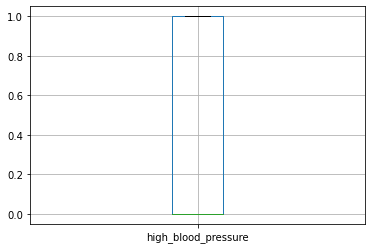

In [202]:
fig = plt.figure()
boxplot = heart.boxplot(column=['high_blood_pressure'])

<AxesSubplot:ylabel='Frequency'>

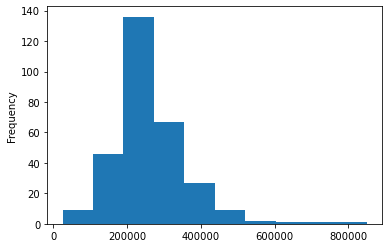

In [203]:
heart['platelets'].plot.hist()

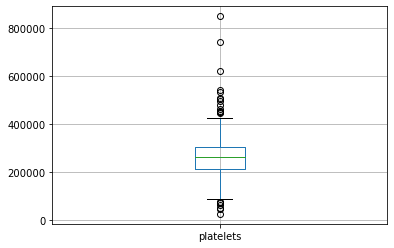

In [204]:
fig = plt.figure()
boxplot = heart.boxplot(column=['platelets'])

<AxesSubplot:ylabel='Frequency'>

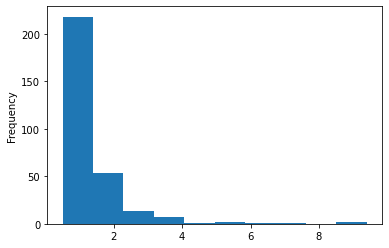

In [205]:
heart['serum_creatinine'].plot.hist()

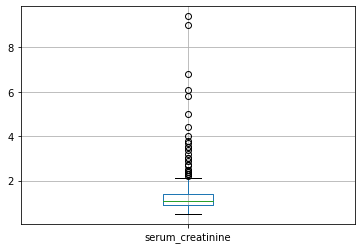

In [206]:
fig = plt.figure()
boxplot = heart.boxplot(column=['serum_creatinine'])

<AxesSubplot:ylabel='Frequency'>

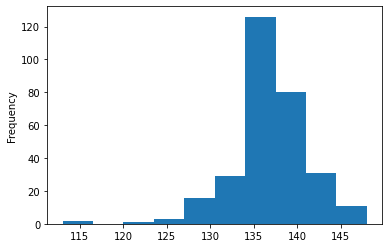

In [207]:
heart['serum_sodium'].plot.hist()

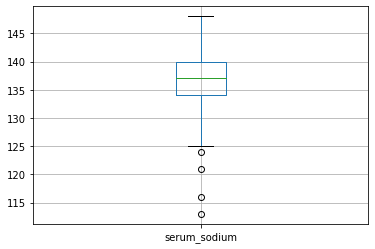

In [208]:
fig = plt.figure()
boxplot = heart.boxplot(column=['serum_sodium'])

<AxesSubplot:ylabel='Frequency'>

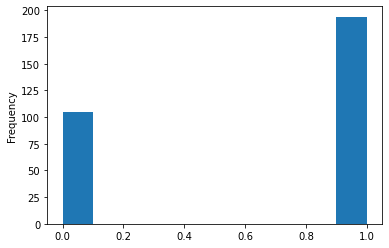

In [209]:
heart['sex'].plot.hist()

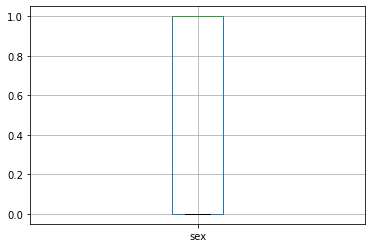

In [210]:
fig = plt.figure()
boxplot = heart.boxplot(column=['sex'])

<AxesSubplot:ylabel='Frequency'>

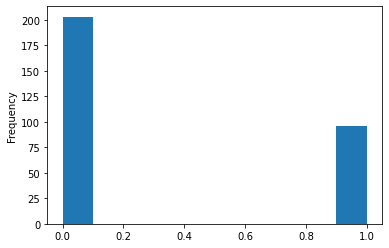

In [211]:
heart['smoking'].plot.hist()

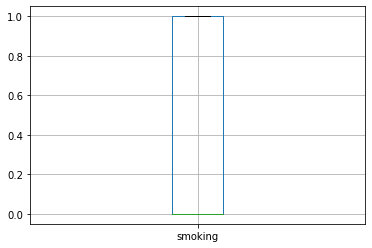

In [212]:
fig = plt.figure()
boxplot = heart.boxplot(column=['smoking'])

<AxesSubplot:ylabel='Frequency'>

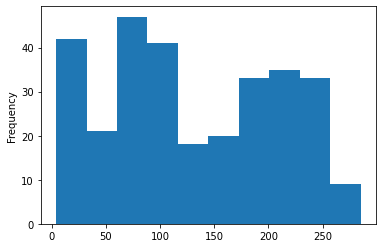

In [213]:
heart['time'].plot.hist()

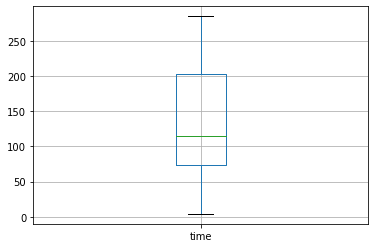

In [214]:
fig = plt.figure()
boxplot = heart.boxplot(column=['time'])

Based on the skewness and boxplot, we've decided to replace the outliers with median value in for these variables:
#### creatinine_phosphokinase
#### ejection_fraction
#### platelets
#### serum_creatinine
#### serum_sodium

Make a subset of above variables

In [215]:
heart_var = heart[["creatinine_phosphokinase", "ejection_fraction","platelets","serum_creatinine","serum_sodium"]]

In [216]:
heart.drop(["creatinine_phosphokinase", "ejection_fraction","platelets","serum_creatinine","serum_sodium"], axis=1, inplace=True)
heart.head()

,age,anaemia,diabetes,high_blood_pressure,sex,smoking,time,DEATH_EVENT
0,75.0,0,0,1,1,0,4,1
1,55.0,0,0,0,1,0,6,1
2,65.0,0,0,0,1,1,7,1
3,50.0,1,0,0,1,0,7,1
4,65.0,1,1,0,0,0,8,1


In [217]:
heart_var.head()

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,582,20,265000.00,1.9,130
1,7861,38,263358.03,1.1,136
2,146,20,162000.00,1.3,129
3,111,20,210000.00,1.9,137
4,160,20,327000.00,2.7,116


Replace outliers with median values

In [218]:
for col in heart_var:   
    
    q3 = np.percentile(heart_var[col], 75)
    q1 = np.percentile(heart_var[col], 25)
    iqr = q3 - q1
    
    lower = q1 -(1.5 * iqr) 
    upper = q3 +(1.5 * iqr)
    
    med = heart_var[col].median()

    heart_var[col] = np.where((heart_var[col] >= upper), med ,heart_var[col]) 
    
    heart_var[col] = np.where((heart_var[col] <= lower), med ,heart_var[col])

In [219]:
heart = pd.concat([heart_var, heart], axis=1, join='inner')

In [220]:
heart.head()

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,age,anaemia,diabetes,high_blood_pressure,sex,smoking,time,DEATH_EVENT
0,582.0,20.0,265000.00,1.9,130.0,75.0,0,0,1,1,0,4,1
1,250.0,38.0,263358.03,1.1,136.0,55.0,0,0,0,1,0,6,1
2,146.0,20.0,162000.00,1.3,129.0,65.0,0,0,0,1,1,7,1
3,111.0,20.0,210000.00,1.9,137.0,50.0,1,0,0,1,0,7,1
4,160.0,20.0,327000.00,1.1,137.0,65.0,1,1,0,0,0,8,1


Check for outliers again

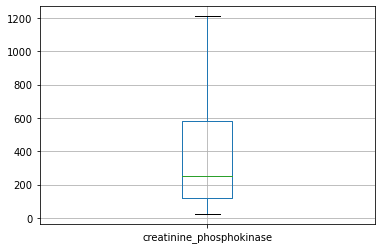

In [221]:
fig = plt.figure()
boxplot = heart.boxplot(column=['creatinine_phosphokinase'])

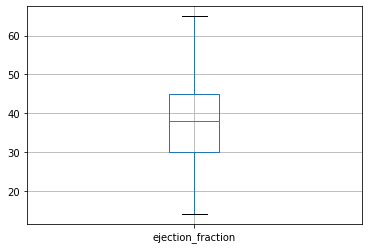

In [222]:
fig = plt.figure()
boxplot = heart.boxplot(column=['ejection_fraction'])

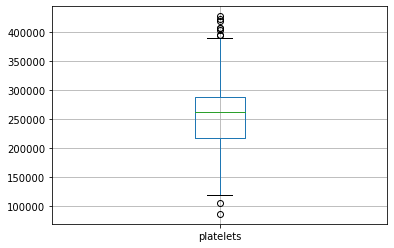

In [223]:
fig = plt.figure()
boxplot = heart.boxplot(column=['platelets'])

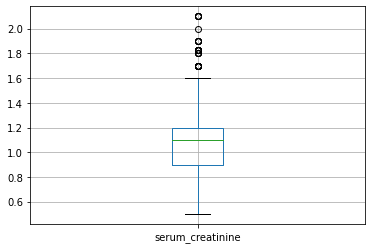

In [224]:
fig = plt.figure()
boxplot = heart.boxplot(column=['serum_creatinine'])

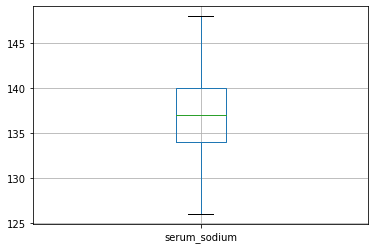

In [225]:
fig = plt.figure()
boxplot = heart.boxplot(column=['serum_sodium'])

Use barchart to look at the relationships between categorical features and DEATH_EVENT. Categorical features include:
#### anaemia
#### diabetes
#### high_blood_pressure
#### sex
#### smoking

#### Normally, for categorical data, the values should be strings instead of '0' and '1'. If then we would perform add dummy variables so the attributes can be used for model building. But the dataset comes in binary format, so we skip that step.

Raw barcharts vs Normalized barcharts

<AxesSubplot:xlabel='anaemia'>

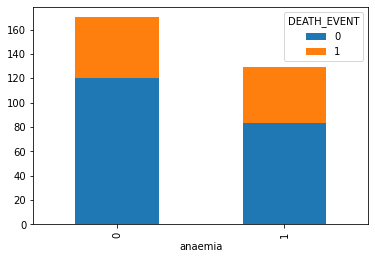

In [226]:
crosstab_anaemia = pd.crosstab(heart['anaemia'], heart['DEATH_EVENT'])
crosstab_anaemia.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='anaemia'>

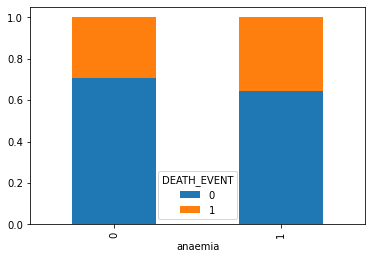

In [227]:
crosstab_norm_anaemia = crosstab_anaemia.div(crosstab_anaemia.sum(axis=1), axis = 0)
crosstab_norm_anaemia.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='diabetes'>

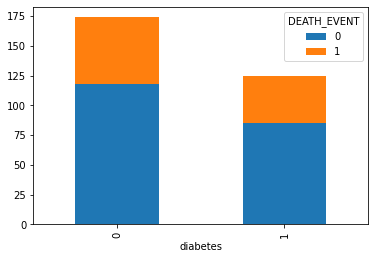

In [228]:
crosstab_diabetes = pd.crosstab(heart['diabetes'], heart['DEATH_EVENT'])
crosstab_diabetes.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='diabetes'>

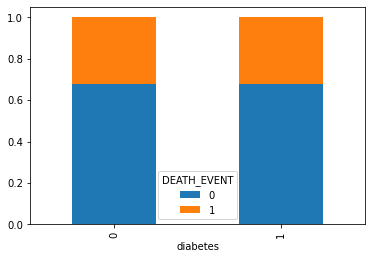

In [229]:
crosstab_norm_diabetes = crosstab_diabetes.div(crosstab_diabetes.sum(axis=1), axis = 0)
crosstab_norm_diabetes.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='high_blood_pressure'>

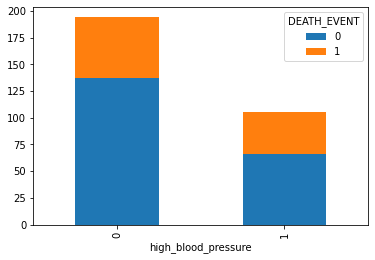

In [230]:
crosstab_high_blood_pressure = pd.crosstab(heart['high_blood_pressure'], heart['DEATH_EVENT'])
crosstab_high_blood_pressure.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='high_blood_pressure'>

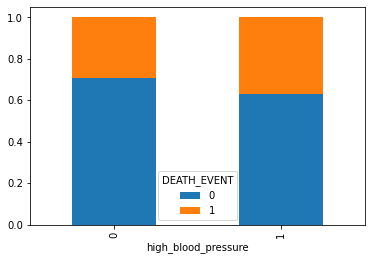

In [231]:
crosstab_norm_high_blood_pressure = crosstab_high_blood_pressure.div(crosstab_high_blood_pressure.sum(axis=1), axis = 0)
crosstab_norm_high_blood_pressure.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='sex'>

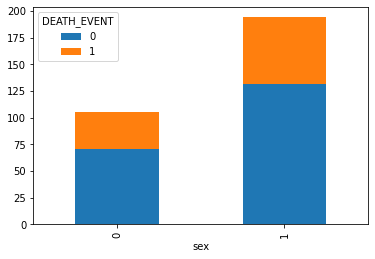

In [232]:
crosstab_sex = pd.crosstab(heart['sex'], heart['DEATH_EVENT'])
crosstab_sex.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='sex'>

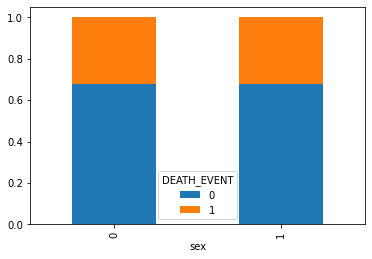

In [233]:
crosstab_norm_sex = crosstab_sex.div(crosstab_sex.sum(axis=1), axis = 0)
crosstab_norm_sex.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='smoking'>

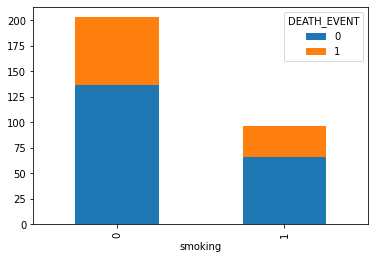

In [234]:
crosstab_smoking = pd.crosstab(heart['smoking'], heart['DEATH_EVENT'])
crosstab_smoking.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='smoking'>

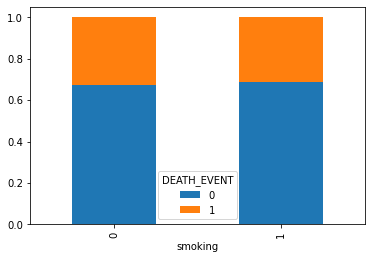

In [235]:
crosstab_norm_smoking = crosstab_smoking.div(crosstab_smoking.sum(axis=1), axis = 0)
crosstab_norm_smoking.plot(kind='bar', stacked = True)

From the above barcharts we can tell that besides having anaemia and high blood pressure is more likely to cause death; the rest of attributes does not necessarily indicate a death event.

#### Check for multicollinearity.

In [236]:
X = pd.DataFrame(heart[['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine',
                       'serum_sodium','age','anaemia','diabetes','high_blood_pressure','sex','smoking','time']])

[Text(0.5, 0, 'creatinine_phosphokinase'),
 Text(1.5, 0, 'ejection_fraction'),
 Text(2.5, 0, 'platelets'),
 Text(3.5, 0, 'serum_creatinine'),
 Text(4.5, 0, 'serum_sodium'),
 Text(5.5, 0, 'age'),
 Text(6.5, 0, 'anaemia'),
 Text(7.5, 0, 'diabetes'),
 Text(8.5, 0, 'high_blood_pressure'),
 Text(9.5, 0, 'sex'),
 Text(10.5, 0, 'smoking'),
 Text(11.5, 0, 'time')]

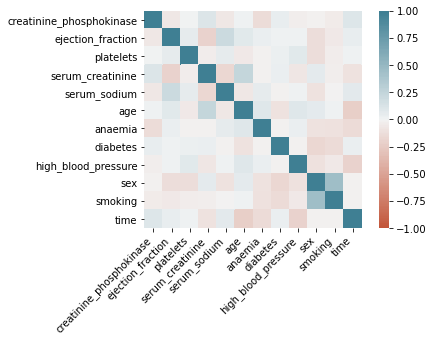

In [237]:
corr = X.corr(method='pearson')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [238]:
X.corr()

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,age,anaemia,diabetes,high_blood_pressure,sex,smoking,time
creatinine_phosphokinase,1.000000,-0.067257,0.004120,0.111241,-0.069762,0.009850,-0.140354,0.046520,-0.026001,-0.023429,-0.039783,0.105010
ejection_fraction,-0.067257,1.000000,0.054128,-0.199611,0.197044,0.084025,0.032626,0.013359,0.021615,-0.124140,-0.054775,0.045928
platelets,0.004120,0.054128,1.000000,-0.038749,0.054843,-0.053858,-0.017397,0.030895,0.078735,-0.124587,-0.038568,0.012067
serum_creatinine,0.111241,-0.199611,-0.038749,1.000000,-0.166704,0.249123,-0.011042,0.033689,-0.072018,0.065473,-0.028481,-0.097407
serum_sodium,-0.069762,0.197044,0.054843,-0.166704,1.000000,-0.065669,0.048716,-0.014613,0.011385,-0.091244,-0.001238,0.072922
age,0.009850,0.084025,-0.053858,0.249123,-0.065669,1.000000,0.088006,-0.101012,0.093289,0.065430,0.018668,-0.224068
anaemia,-0.140354,0.032626,-0.017397,-0.011042,0.048716,0.088006,1.000000,-0.012729,0.038182,-0.094769,-0.107290,-0.141414
diabetes,0.046520,0.013359,0.030895,0.033689,-0.014613,-0.101012,-0.012729,1.000000,-0.012732,-0.157730,-0.147173,0.033726
high_blood_pressure,-0.026001,0.021615,0.078735,-0.072018,0.011385,0.093289,0.038182,-0.012732,1.000000,-0.104615,-0.055711,-0.196439
sex,-0.023429,-0.124140,-0.124587,0.065473,-0.091244,0.065430,-0.094769,-0.157730,-0.104615,1.000000,0.445892,-0.015608


In [239]:
X.corr()[abs(X.corr())>=0.5]

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,age,anaemia,diabetes,high_blood_pressure,sex,smoking,time
creatinine_phosphokinase,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ejection_fraction,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
platelets,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
serum_creatinine,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
serum_sodium,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
anaemia,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
diabetes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
high_blood_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


No Multicollinearity.

### Partition the data and possible resampling.

75% is training set, 25% is test sets

In [240]:
heart_train, heart_test = train_test_split(heart, test_size = 0.25, random_state = 7)

In [241]:
print('Total number of records: ', heart.shape[0])

Total number of records:  299


In [242]:
print("Number of training record is {} and has proportion of {}%".format(heart_train.shape[0], 
                                                                        round(100*heart_train.shape[0]/heart.shape[0],2)))

Number of training record is 224 and has proportion of 74.92%


In [243]:
print("Number of test record is {} and has proportion of {}%".format(heart_test.shape[0], 
                                                                        round(100*heart_test.shape[0]/heart.shape[0],2)))

Number of test record is 75 and has proportion of 25.08%


<BarContainer object of 2 artists>

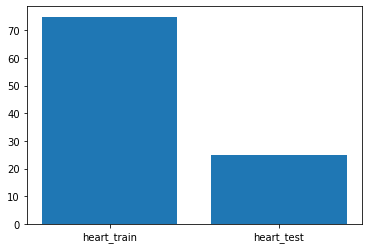

In [244]:
names = ['heart_train', 'heart_test']
percent = [round(100*heart_train.shape[0]/heart.shape[0],2), round(100*heart_test.shape[0]/heart.shape[0],2)]
plt.bar(names, percent)

Check for proportion of death event counts

In [245]:
heart_test['DEATH_EVENT'].value_counts(normalize=True)

0    0.76
1    0.24
Name: DEATH_EVENT, dtype: float64

This shows the proportion of target variable is 24% (death events), no resampling needed.

### Model Building

#### C5.0
#### CART
#### Logistic Regression
#### Random Forest
#### Naive Bayes
#### Neural Network

In [246]:
#heart_train.head()

In [247]:
#heart_test.head()

In [248]:
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#preparing variables of training dataset for building model  

train_y = heart_train[['DEATH_EVENT']]

#all categorical variables from thr dataframe
train_X = heart_train[['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','anaemia','diabetes','high_blood_pressure','smoking']]







In [249]:
#preparing variables of test dataset for building model 

test_y = heart_test[['DEATH_EVENT']]


test_X = heart_test[['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','anaemia','diabetes','high_blood_pressure','smoking']]









#### C5.0





In [298]:
#Building C5.0 algorithm
C50 = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes= 5).fit(train_X, train_y)

#pred_C50_train =c50.predict(train_X)

#Use c5.0 model to predict on test data
pred_C50 = C50.predict(test_X)

#Contingency table
contingency_C50 = pd.crosstab(heart_test['DEATH_EVENT'],pred_C50)

#Total sum per column: 
contingency_C50.loc['Total',:]= contingency_C50.sum(axis=0)

#Total sum per row: 
contingency_C50.loc[:,'Total'] = contingency_C50.sum(axis=1)
contingency_C50



col_0,0,1,Total
DEATH_EVENT,,,
0,54.0,3.0,57.0
1,13.0,5.0,18.0
Total,67.0,8.0,75.0


In [299]:
#calculating evaluation measures
contingency_C50_arr = contingency_C50.values

TN_c5 = contingency_C50_arr[0][0]
FP_c5 = contingency_C50_arr[0][1]
FN_c5 = contingency_C50_arr[1][0]
TP_c5 = contingency_C50_arr[1][1]
TPN_c5 = TN_c5 + FN_c5
TPP_c5 = FP_c5 + TP_c5
TAN_c5 = TN_c5 + FP_c5
TAP_c5 = FN_c5 + TP_c5
GT_c5 = TN_c5 + FN_c5 + FP_c5 + TP_c5

print('TN: ', TN_c5,
      '\nFP: ', FP_c5,
      '\nFN: ', FN_c5,
      '\nTP: ', TP_c5,
      '\nTPN: ', TPN_c5,
      '\nTPP: ', TPP_c5,
      '\nTAN: ', TAN_c5,
      '\nTAP: ', TAP_c5,
      '\nGT: ', GT_c5,
     )

TN:  54.0 
FP:  3.0 
FN:  13.0 
TP:  5.0 
TPN:  67.0 
TPP:  8.0 
TAN:  57.0 
TAP:  18.0 
GT:  75.0


In [300]:
acc_c50 = round(((TN_c5+TP_c5)/GT_c5),4)
error_c50 = round(1-(TN_c5+TP_c5)/GT_c5,4)
sensi_c50 = round(TP_c5/TAP_c5,4)
speci_c50 = round(TN_c5/TAN_c5,4)
preci_c50 = round(TP_c5/TPP_c5,4)

print("Accuracy for C5.0 model is: ",acc_c50,
     '\nError Rate for C5.0 model is: ', error_c50,
     '\nSensitivity of C5.0 model is: ', sensi_c50, 
      '\nSpecificity of C5.0 model is: ', speci_c50,
      '\nPrecision of C5.0 model is: ', preci_c50,
     )

Accuracy for C5.0 model is:  0.7867 
Error Rate for C5.0 model is:  0.2133 
Sensitivity of C5.0 model is:  0.2778 
Specificity of C5.0 model is:  0.9474 
Precision of C5.0 model is:  0.625


[Text(1116.0, 951.3000000000001, 'serum_creatinine <= 0.95\nentropy = 0.932\nsamples = 224\nvalue = [146, 78]\nclass = 0'),
 Text(558.0, 679.5, 'ejection_fraction <= 27.5\nentropy = 0.561\nsamples = 61\nvalue = [53, 8]\nclass = 0'),
 Text(279.0, 407.70000000000005, 'entropy = 0.918\nsamples = 6\nvalue = [2, 4]\nclass = 1'),
 Text(837.0, 407.70000000000005, 'serum_creatinine <= 0.65\nentropy = 0.376\nsamples = 55\nvalue = [51, 4]\nclass = 0'),
 Text(558.0, 135.89999999999998, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass = 1'),
 Text(1116.0, 135.89999999999998, 'entropy = 0.235\nsamples = 52\nvalue = [50, 2]\nclass = 0'),
 Text(1674.0, 679.5, 'serum_creatinine <= 1.815\nentropy = 0.986\nsamples = 163\nvalue = [93, 70]\nclass = 0'),
 Text(1395.0, 407.70000000000005, 'entropy = 0.964\nsamples = 149\nvalue = [91, 58]\nclass = 0'),
 Text(1953.0, 407.70000000000005, 'entropy = 0.592\nsamples = 14\nvalue = [2, 12]\nclass = 1')]

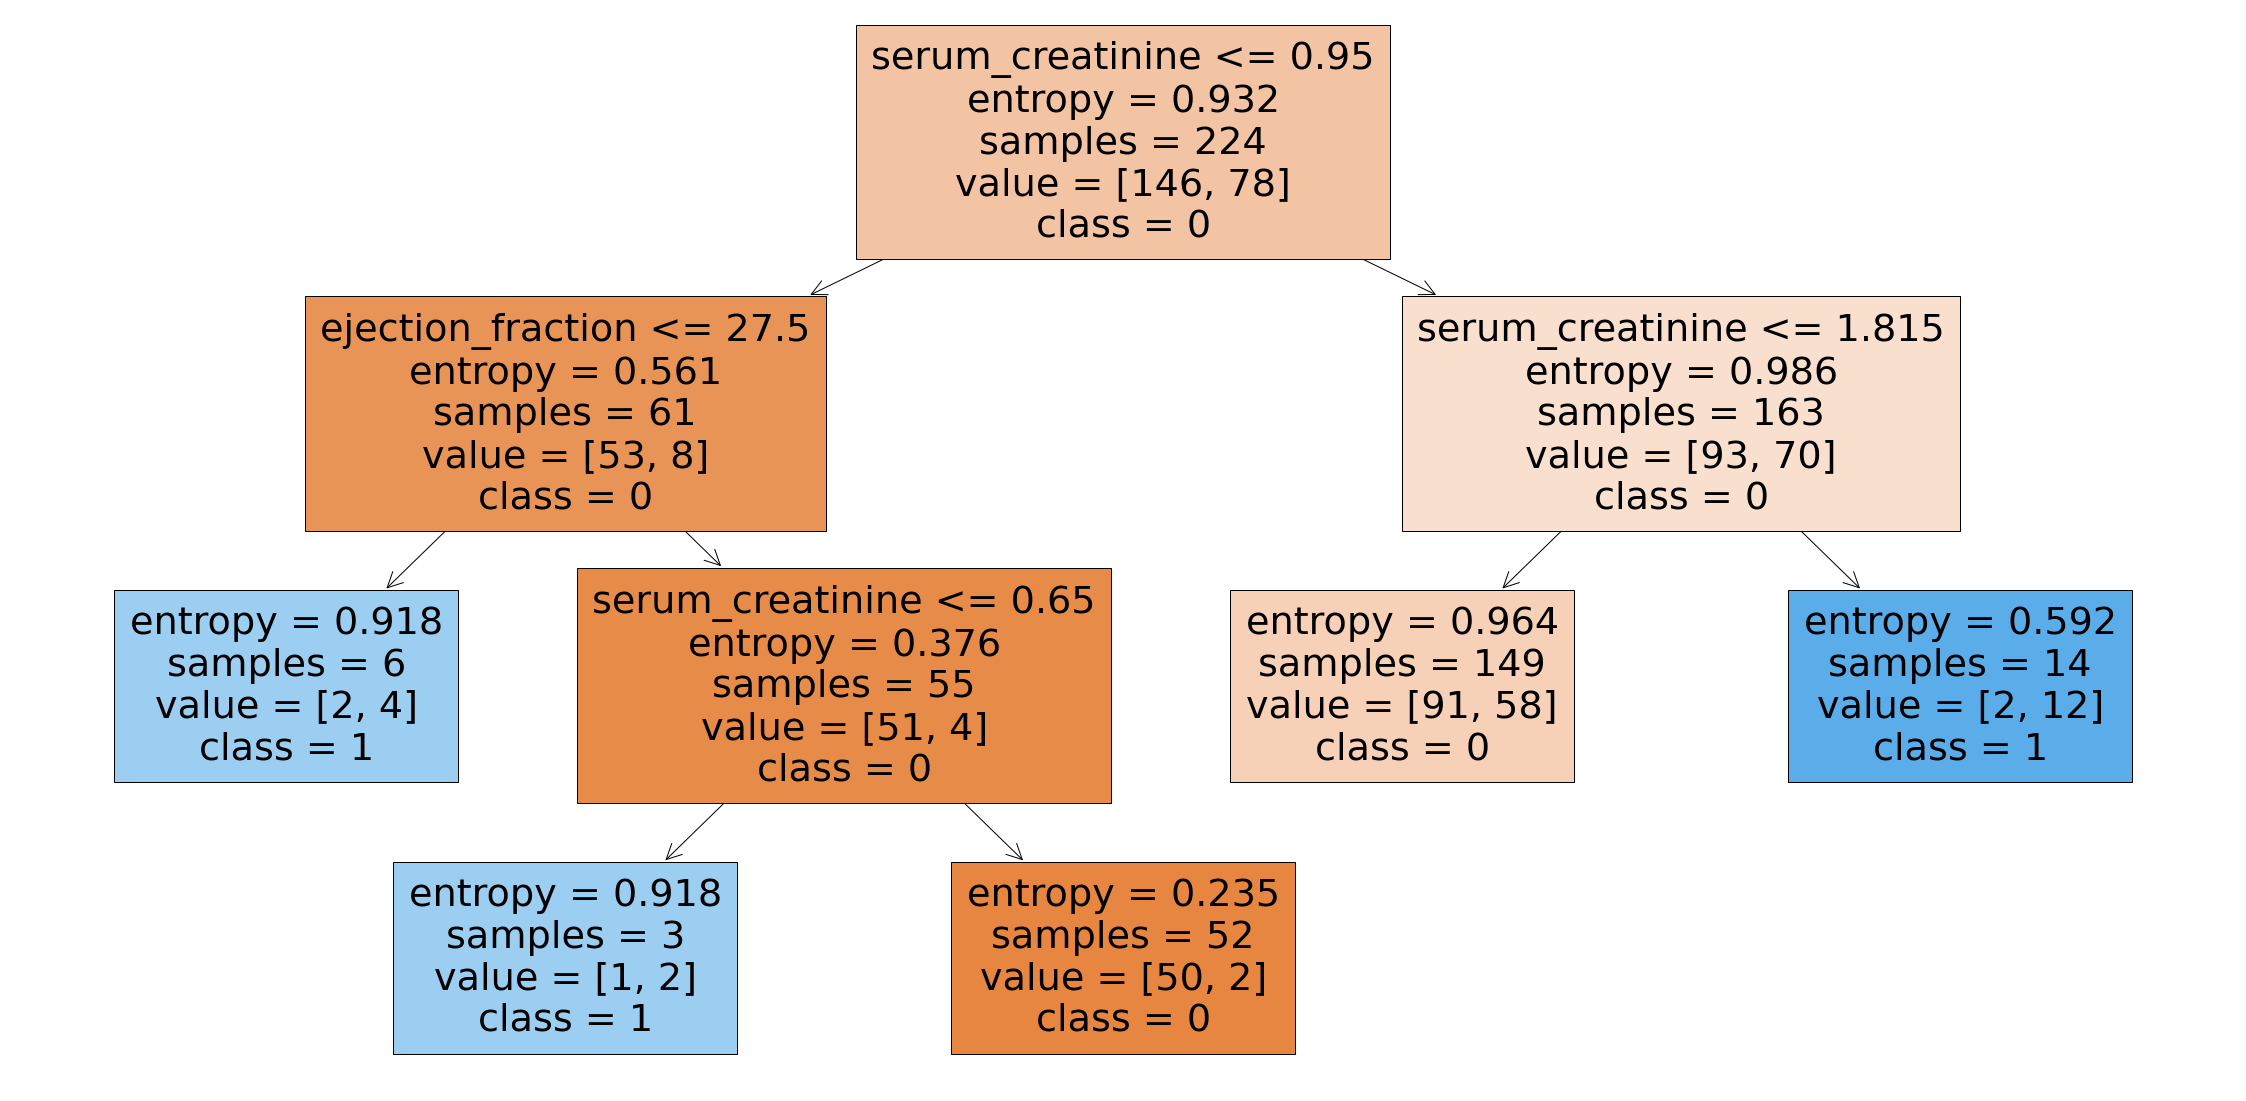

In [306]:
plt.figure(figsize=(40,20))
plot_tree(C50, feature_names = train_X.columns, class_names = (train_y['DEATH_EVENT']).astype(str).unique(),
          filled=True
          )



#### CART





[Text(992.0, 951.3000000000001, 'serum_creatinine <= 1.05\ngini = 0.454\nsamples = 224\nvalue = [146, 78]\nclass = 0'),
 Text(496.0, 679.5, 'serum_sodium <= 129.0\ngini = 0.307\nsamples = 95\nvalue = [77, 18]\nclass = 0'),
 Text(248.0, 407.70000000000005, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(744.0, 407.70000000000005, 'gini = 0.285\nsamples = 93\nvalue = [77, 16]\nclass = 0'),
 Text(1488.0, 679.5, 'ejection_fraction <= 22.5\ngini = 0.498\nsamples = 129\nvalue = [69, 60]\nclass = 0'),
 Text(1240.0, 407.70000000000005, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]\nclass = 1'),
 Text(1736.0, 407.70000000000005, 'serum_creatinine <= 1.815\ngini = 0.484\nsamples = 117\nvalue = [69, 48]\nclass = 0'),
 Text(1488.0, 135.89999999999998, 'gini = 0.468\nsamples = 107\nvalue = [67, 40]\nclass = 0'),
 Text(1984.0, 135.89999999999998, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]\nclass = 1')]

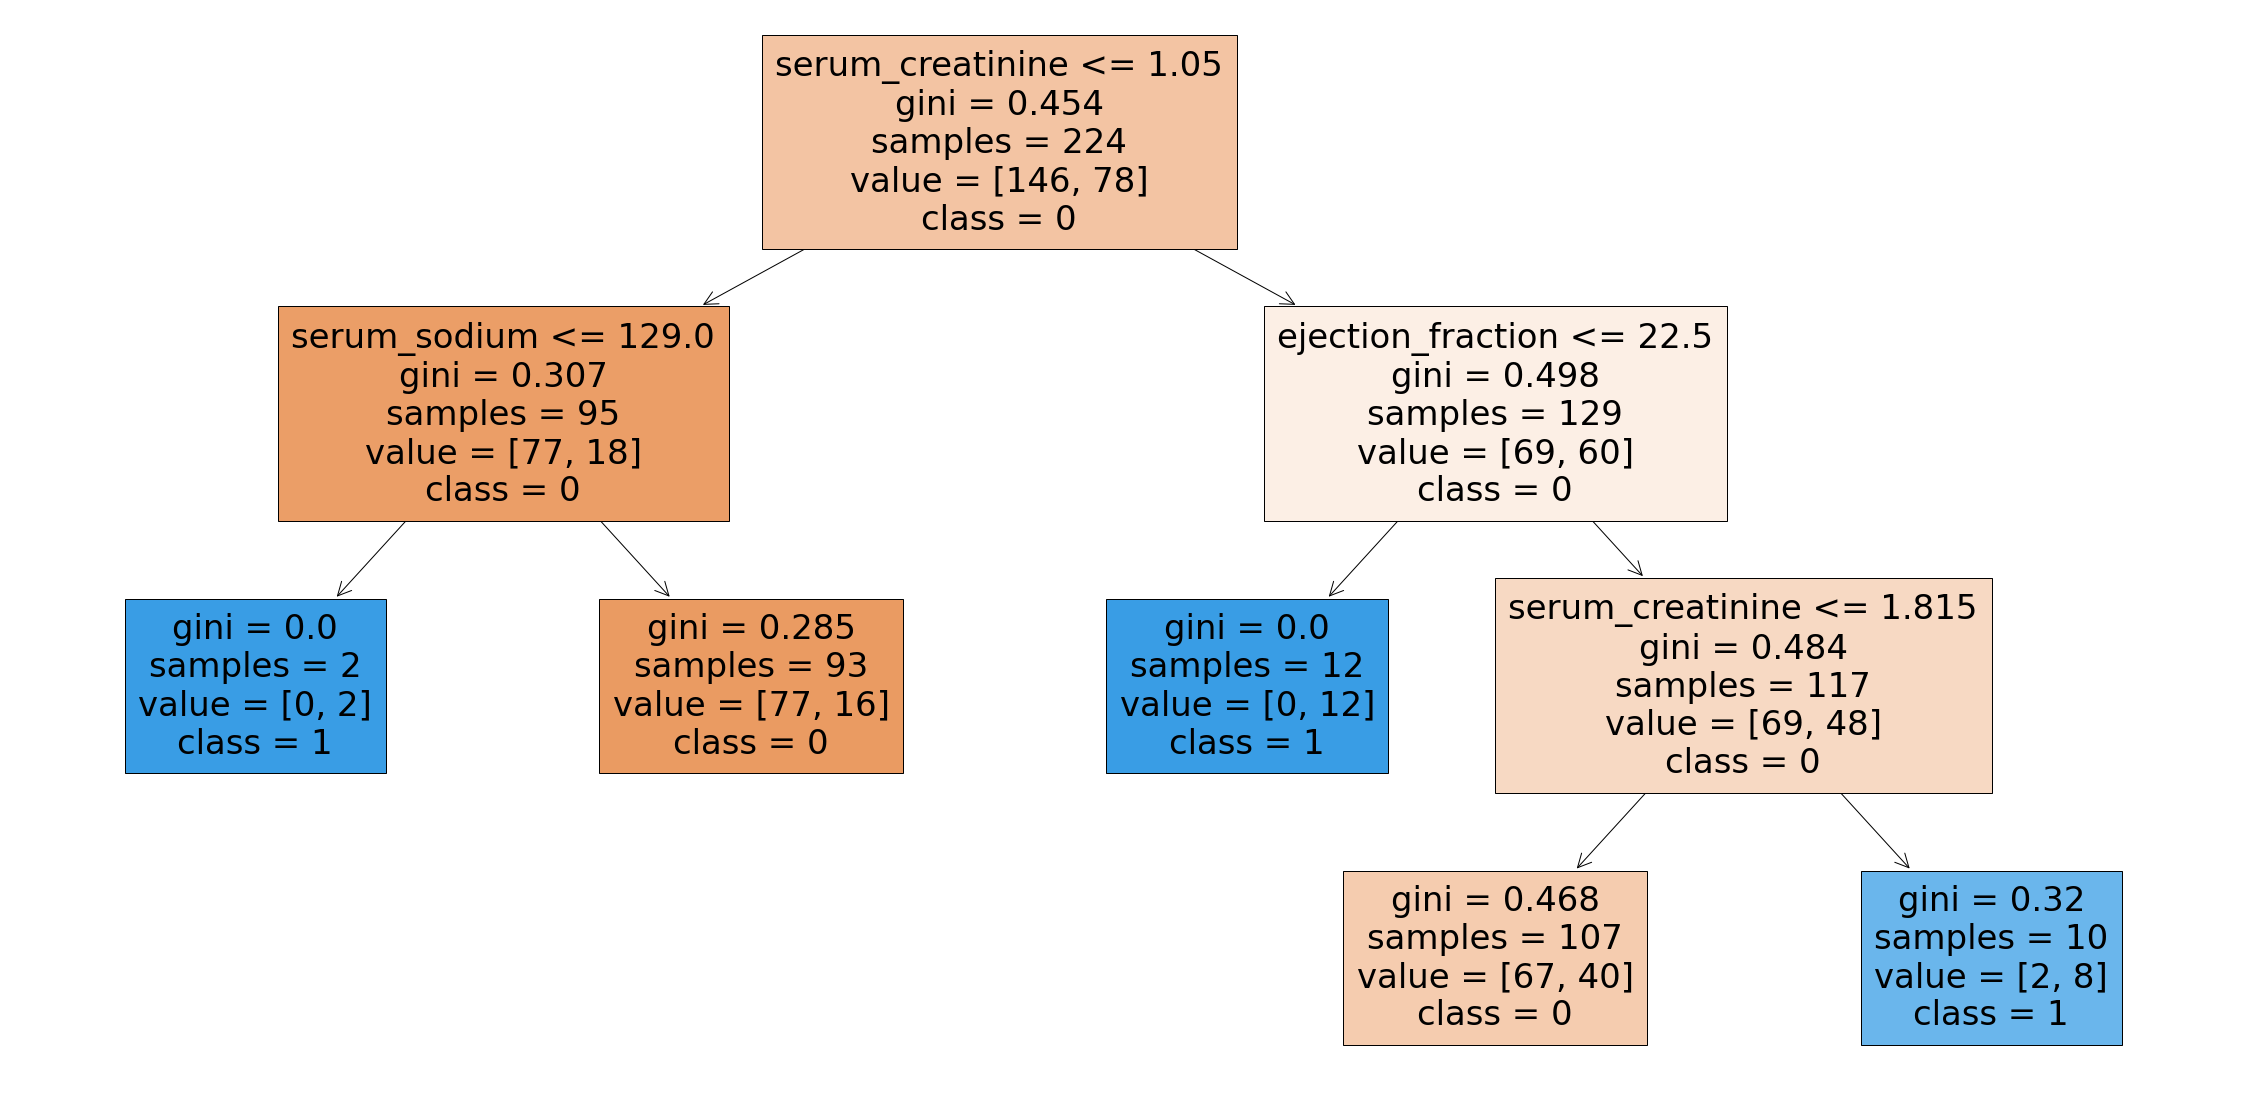

In [311]:
#Building CART Model
cart = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes= 5).fit(train_X, train_y)

#pred_cart_train = cart.predict(train_X)

plt.figure(figsize=(40,20))
plot_tree(cart,
          feature_names = train_X.columns, 
          class_names = train_y['DEATH_EVENT'].astype(str).unique(),
          filled=True
          )

In [308]:
#Use CART model to predict on test data
pred_cart_test = cart.predict(test_X)

#Contingency table 
contingency_cart = pd.crosstab(heart_test['DEATH_EVENT'],pred_cart_test)

#Total sum per column: 
contingency_cart.loc['Total',:]= contingency_cart.sum(axis=0)

#Total sum per row: 
contingency_cart.loc[:,'Total'] = contingency_cart.sum(axis=1)
contingency_cart

col_0,0,1,Total
DEATH_EVENT,,,
0,57.0,0.0,57.0
1,9.0,9.0,18.0
Total,66.0,9.0,75.0


In [309]:
contingency_cart_arr = contingency_cart.values

TN_cart = contingency_cart_arr[0][0]
FP_cart = contingency_cart_arr[0][1]
FN_cart = contingency_cart_arr[1][0]
TP_cart = contingency_cart_arr[1][1]
TPN_cart = TN_cart + FN_cart
TPP_cart = FP_cart + TP_cart
TAN_cart = TN_cart + FP_cart
TAP_cart = FN_cart + TP_cart
GT_cart = TN_cart + FN_cart + FP_cart + TP_cart

print('TN: ', TN_cart,
      '\nFP: ', FP_cart,
      '\nFN: ', FN_cart,
      '\nTP: ', TP_cart,
      '\nTPN: ', TPN_cart,
      '\nTPP: ', TPP_cart,
      '\nTAN: ', TAN_cart,
      '\nTAP: ', TAP_cart,
      '\nGT: ', GT_cart,
     )

TN:  57.0 
FP:  0.0 
FN:  9.0 
TP:  9.0 
TPN:  66.0 
TPP:  9.0 
TAN:  57.0 
TAP:  18.0 
GT:  75.0


In [310]:
acc_cart = round(((TN_cart+TP_cart)/GT_cart),4)
error_cart = round(1-(TN_cart+TP_cart)/GT_cart,4)
sensi_cart = round(TP_cart/TAP_cart,4)
speci_cart = round(TN_cart/TAN_cart,4)
preci_cart = round(TP_cart/TPP_cart,4)

print("Accuracy for CART model is: ",acc_cart,
     '\nError Rate for CART model is: ', error_cart ,
     '\nSensitivity of CART model is: ', sensi_cart,
      '\nSpecificity of CART model is: ', speci_cart,
      '\nPrecision of CART model is: ', preci_cart ,
     )

Accuracy for CART model is:  0.88 
Error Rate for CART model is:  0.12 
Sensitivity of CART model is:  0.5 
Specificity of CART model is:  1.0 
Precision of CART model is:  1.0





#### Logistic Regression 




In [319]:
#assigning variables to perform logistic regresssion 

X = pd.DataFrame(heart_train[['anaemia', 'high_blood_pressure', 'diabetes', 'smoking','creatinine_phosphokinase','ejection_fraction','platelets', 'serum_creatinine','serum_sodium','age']])
X = sm.add_constant(X)
y = pd.DataFrame(heart_train[['DEATH_EVENT']])

log_reg = sm.Logit(y, X).fit()
log_reg.summary2()

Optimization terminated successfully.
         Current function value: 0.540962
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Pseudo R-squared:   0.163     
Dependent Variable:    DEATH_EVENT        AIC:                264.3508  
Date:                  2021-08-11 17:11   BIC:                301.8789  
No. Observations:      224                Log-Likelihood:     -121.18   
Df Model:              10                 LL-Null:            -144.78   
Df Residuals:          213                LLR p-value:        8.6584e-07
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        6.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
const                     7.9773   6.1204  1.3034 0.1924 -4.0184 19.9730
anaemia                   0.2417   0.3244  0.7450 0.4563 -0.3941  0.8774
high_blood_pressure       0.2471   0.3308  0.7469 0.4551 -0.4012  0.8954
diabetes                  0.0235   0.3263  0.0721 0.9425 -0.6160  0.6630
smoking                   0.1096   0.3413  0.3210 0.7482 -0.5594  0.7786
creatinine_phosphokinase -0.0004   0.0006 -0.5904 0.5549 -0.0016  0.0008
ejection_fraction        -0.0415   0.0147 -2.8145 0.0049 -0.0704 -0.0126
platelets                -0.0000   0.0000 -0.9312 0.3517 -0.0000  0.0000
serum_creatinine          1.2559   0.5342  2.3510 0.0187  0.2089  2.3029
serum_sodium             -0.0812   0.0436 -1.8618 0.0626 -0.1667  0.0043
age                       0.0487   0.0139  3.5053 0.0005  0.0215  0.0759
========================================================================

"""

Here p-value of all the predictors excluding age, time, serum_creatine and  ejection_fraction is more than 0.05.Therefore we will have to remodel the logistic regression and inclue only those variables whose p value is less than 0.05.  

In [351]:
#remodeling logistic regression 

X_remodel = pd.DataFrame(heart_train[['ejection_fraction','serum_creatinine','age']])
X_remodel = sm.add_constant(X_remodel)
y_remodel = pd.DataFrame(heart_train[['DEATH_EVENT']])

log_reg_remodel = sm.Logit(y_remodel, X_remodel).fit()
log_reg_remodel.summary2()

Optimization terminated successfully.
         Current function value: 0.553316
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.144     
Dependent Variable: DEATH_EVENT      AIC:              255.8856  
Date:               2021-08-11 18:12 BIC:              269.5322  
No. Observations:   224              Log-Likelihood:   -123.94   
Df Model:           3                LL-Null:          -144.78   
Df Residuals:       220              LLR p-value:      4.7091e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -3.5947   1.0277 -3.4978 0.0005 -5.6089 -1.5804
ejection_fraction -0.0457   0.0145 -3.1552 0.0016 -0.0741 -0.0173
serum_creatinine   1.2741   0.5137  2.4803 0.0131  0.2673  2.2809
age                0.0516   0.0134  3.8477 0.0001  0.0253  0.0778
=================================================================

"""

In [352]:
X_test = pd.DataFrame(heart_test[['ejection_fraction','serum_creatinine','age']])
X_test = sm.add_constant(X_test)
y_test = pd.DataFrame(heart_test[['DEATH_EVENT']])


We can look at the performance metrics using confusion_matrix. But first, we need to make predictions using the model: the outputs given back by the model are probabilities of the instance being the positive class. If probability > 0.5, the instance is considered the positive class.

In [353]:
#obtaining prediction using logistic regression model
predictions_prob = log_reg_remodel.predict(X_test)
predictions_prob.head()

268    0.134113
240    0.517728
278    0.182987
176    0.356294
202    0.170532
dtype: float64

In [354]:
predictions_logistic = (log_reg_remodel.predict(X_test) > 0.5).astype(int)
predictions_logistic.head()

268    0
240    1
278    0
176    0
202    0
dtype: int64

In [355]:
contingency_logistic = confusion_matrix(y_test, predictions_logistic)
TN_lr = contingency_logistic[0][0]
FP_lr = contingency_logistic[0][1]
FN_lr = contingency_logistic[1][0]
TP_lr = contingency_logistic[1][1]

TPN_lr = TN_lr + FN_lr
TPP_lr = FP_lr + TP_lr
TAN_lr = TN_lr + FP_lr
TAP_lr = FN_lr + TP_lr
GT_lr = TN_lr + FN_lr + FP_lr + TP_lr

print('TN: ', TN_lr,
      '\nFP: ', FP_lr,
      '\nFN: ', FN_lr,
      '\nTP: ', TP_lr,
      '\nTPN: ', TPN_lr,
      '\nTPP: ', TPP_lr,
      '\nTAN: ', TAN_lr,
      '\nTAP: ', TAP_lr,
      '\nGT: ', GT_lr,
     )

TN:  53 
FP:  4 
FN:  8 
TP:  10 
TPN:  61 
TPP:  14 
TAN:  57 
TAP:  18 
GT:  75


In [356]:
acc_lr = round(((TN_lr+TP_lr)/GT_lr),4)
error_lr = round(1-(TN_lr+TP_lr)/GT_lr,4)
sensi_lr = round(TP_lr/TAP_lr,4)
speci_lr = round(TN_lr/TAN_lr,4)
preci_lr = round(TP_lr/TPP_lr,4)





print("Accuracy for logistic regression model is: ",acc_lr,
     '\nError Rate for logistic regression model is: ', error_lr,
     '\nSensitivity of logistic regression model is: ',sensi_lr ,
      '\nSpecificity of logistic regression model is: ',speci_lr ,
      '\nPrecision of logistic regression model is: ',preci_lr ,
     )

Accuracy for logistic regression model is:  0.84 
Error Rate for logistic regression model is:  0.16 
Sensitivity of logistic regression model is:  0.5556 
Specificity of logistic regression model is:  0.9298 
Precision of logistic regression model is:  0.7143






#### Random Forest





In [264]:
from sklearn.ensemble import RandomForestClassifier
rfy = np.ravel(Y)

rand_forest = RandomForestClassifier(n_estimators = 100,criterion="gini").fit(train_X,rfy)
pred_rf_train= rand_forest.predict(train_X)

In [265]:
#Use random forest model to predict on test data
pred_rf_test = rand_forest.predict(test_X)

#Contingency table 
contingency_rf = pd.crosstab(heart_test['DEATH_EVENT'],pred_rf_test)

#Total sum per column: 
contingency_rf.loc['Total',:]= contingency_rf.sum(axis=0)

#Total sum per row: 
contingency_rf.loc[:,'Total'] = contingency_rf.sum(axis=1)
contingency_rf

col_0,0,1,Total
DEATH_EVENT,,,
0,54.0,3.0,57.0
1,9.0,9.0,18.0
Total,63.0,12.0,75.0


In [389]:

contingency_rf_arr = contingency_rf.values

TN_rf = contingency_rf_arr[0][0]
FP_rf = contingency_rf_arr[0][1]
FN_rf = contingency_rf_arr[1][0]
TP_rf = contingency_rf_arr[1][1]
TPN_rf = TN_rf + FN_rf
TPP_rf = FP_rf + TP_rf
TAN_rf = TN_rf + FP_rf
TAP_rf = FN_rf + TP_rf
GT_rf = TN_rf + FN_rf + FP_rf + TP_rf

print('TN: ', TN_rf,
      '\nFP: ', FP_rf,
      '\nFN: ', FN_rf,
      '\nTP: ', TP_rf,
      '\nTPN: ', TPN_rf,
      '\nTPP: ', TPP_rf,
      '\nTAN: ', TAN_rf,
      '\nTAP: ', TAP_rf,
      '\nGT: ', GT_rf,
     )


TN:  54.0 
FP:  3.0 
FN:  9.0 
TP:  9.0 
TPN:  63.0 
TPP:  12.0 
TAN:  57.0 
TAP:  18.0 
GT:  75.0


In [390]:
acc_rf = round(((TN_rf+TP_rf)/GT_rf),4)
error_rf = round(1-(TN_rf+TP_rf)/GT_rf,4)
sensi_rf = round(TP_rf/TAP_rf,4)
speci_rf = round(TN_rf/TAN_rf,4)
preci_rf =  round(TP_rf/TPP_rf,4)






print("Accuracy for random forest model is: ",acc_rf,
     '\nError Rate for random forest model is: ',error_rf ,
     '\nSensitivity of random forest model is: ',sensi_rf ,
      '\nSpecificity of random forest model is: ',speci_rf ,
      '\nPrecision of random forest model is: ',preci_rf,
     )

Accuracy for random forest model is:  0.84 
Error Rate for random forest model is:  0.16 
Sensitivity of random forest model is:  0.5 
Specificity of random forest model is:  0.9474 
Precision of random forest model is:  0.75





#### Naive Bayes




In [391]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB().fit(train_X, train_y)

In [392]:
pred_naiv = naive_bayes.predict(test_X)

#Contingency table 
contingency_nb = pd.crosstab(heart_test['DEATH_EVENT'],pred_naiv)

#Total sum per column: 
contingency_nb.loc['Total',:]= contingency_nb.sum(axis=0)

#Total sum per row: 
contingency_nb.loc[:,'Total'] = contingency_nb.sum(axis=1)
contingency_nb


col_0,0,1,Total
DEATH_EVENT,,,
0,35.0,22.0,57.0
1,11.0,7.0,18.0
Total,46.0,29.0,75.0


In [393]:
contingency_nb_arr = contingency_nb.values

TN_nb = contingency_nb_arr[0][0]
FP_nb = contingency_nb_arr[0][1]
FN_nb = contingency_nb_arr[1][0]
TP_nb = contingency_nb_arr[1][1]
TPN_nb = TN_nb + FN_nb
TPP_nb = FP_nb + TP_nb
TAN_nb = TN_nb + FP_nb
TAP_nb = FN_nb + TP_nb
GT_nb = TN_nb + FN_nb + FP_nb + TP_nb

print('TN: ', TN_nb,
      '\nFP: ', FP_nb,
      '\nFN: ', FN_nb,
      '\nTP: ', TP_nb,
      '\nTPN: ', TPN_nb,
      '\nTPP: ', TPP_nb,
      '\nTAN: ', TAN_nb,
      '\nTAP: ', TAP_nb,
      '\nGT: ', GT_nb,
     )



TN:  35.0 
FP:  22.0 
FN:  11.0 
TP:  7.0 
TPN:  46.0 
TPP:  29.0 
TAN:  57.0 
TAP:  18.0 
GT:  75.0


In [394]:
acc_nb = round(((TN_nb+TP_nb)/GT_nb),4)
error_nb = round(1-(TN_nb+TP_nb)/GT_nb,4)
sensi_nb = round(TP_nb/TAP_nb,4)
speci_nb = round(TN_nb/TAN_nb,4)
preci_nb =  round(TP_nb/TPP_nb,4)





print("Accuracy for Z model is: ",acc_nb,
     '\nError Rate for Naive Bayes model is: ', error_nb,
     '\nSensitivity of Naive Bayes model is: ', sensi_nb,
      '\nSpecificity of Naive Bayes model is: ', speci_nb,
      '\nPrecision of Naive Bayes model is: ', preci_nb,
     )

Accuracy for Z model is:  0.56 
Error Rate for Naive Bayes model is:  0.44 
Sensitivity of Naive Bayes model is:  0.3889 
Specificity of Naive Bayes model is:  0.614 
Precision of Naive Bayes model is:  0.2414


In [395]:
# Normilzation for training set

ejection_fraction_norm = (heart_train['ejection_fraction'] - heart_train['ejection_fraction'].min()) / (heart_train['ejection_fraction'].max() - heart_train['ejection_fraction'].min())

serum_creatinine_norm = (heart_train['serum_creatinine'] - heart_train['serum_creatinine'].min()) / (heart_train['serum_creatinine'].max() - heart_train['serum_creatinine'].min())

anaemia_norm = (heart_train['anaemia'] - heart_train['anaemia'].min()) / (heart_train['anaemia'].max() - heart_train['anaemia'].min())

high_blood_pressure_norm = (heart_train['high_blood_pressure'] - heart_train['high_blood_pressure'].min()) / (heart_train['high_blood_pressure'].max() - heart_train['high_blood_pressure'].min())

diabetes_norm = (heart_train['diabetes'] - heart_train['diabetes'].min()) / (heart_train['diabetes'].max() - heart_train['diabetes'].min())

sex_norm = (heart_train['sex'] - heart_train['sex'].min()) / (heart_train['sex'].max() - heart_train['sex'].min())
    
smoking_norm = (heart_train['smoking'] - heart_train['smoking'].min()) / (heart_train['smoking'].max() - heart_train['smoking'].min())

creatinine_phosphokinase_norm = (heart_train['creatinine_phosphokinase'] - heart_train['creatinine_phosphokinase'].min()) / (heart_train['creatinine_phosphokinase'].max() - heart_train['creatinine_phosphokinase'].min())

platelets_norm = (heart_train['platelets'] - heart_train['platelets'].min()) / (heart_train['platelets'].max() - heart_train['platelets'].min())
    
serum_sodium_norm = (heart_train['serum_sodium'] - heart_train['serum_sodium'].min()) / (heart_train['serum_sodium'].max() - heart_train['serum_sodium'].min())
    
    

    
ejection_fraction_norm_1d = np.array(ejection_fraction_norm).reshape(-1,1)
serum_creatinine_norm_1d = np.array(serum_creatinine_norm).reshape(-1,1)
anaemia_norm_1d = np.array(anaemia_norm).reshape(-1,1)
high_blood_pressure_norm_1d = np.array(high_blood_pressure_norm).reshape(-1,1)
diabetes_norm_1d = np.array(diabetes_norm).reshape(-1,1)
sex_norm_1d = np.array(sex_norm).reshape(-1,1)
smoking_norm_1d = np.array(smoking_norm).reshape(-1,1)
creatinine_phosphokinase_norm_1d = np.array(creatinine_phosphokinase_norm).reshape(-1,1)
platelets_norm_1d = np.array(platelets_norm).reshape(-1,1)
serum_sodium_norm_1d = np.array(serum_sodium_norm).reshape(-1,1)










nn_X = np.concatenate((ejection_fraction_norm_1d,serum_creatinine_norm_1d,anaemia_norm_1d,
                       high_blood_pressure_norm_1d,diabetes_norm_1d,smoking_norm_1d,
                       creatinine_phosphokinase_norm_1d,platelets_norm_1d,serum_sodium_norm_1d),axis=1)
nn_y= train_y 


# define the keras model
model = Sequential()
model.add(Dense(1, input_dim=nn_X.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



# fit the keras model on the dataset
nn_model= model.fit(nn_X, nn_y, epochs=10, batch_size=32)

Epoch 1/10
7/7 [==============================] - 0s 1ms/step - loss: 0.6988 - accuracy: 0.6518
Epoch 2/10
7/7 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.6518
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.6518
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.6518
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.6518
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.6518
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.6518
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.6518
Epoch 9/10
7/7 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.6518
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.6518


In [396]:
#import os 
#os.environ["PATH"] += os.pathsep + 'D:/anaconda3/envs/python and r/Lib/site-packages'
from keras.utils.vis_utils import plot_model
plot_model(model,show_shapes = True , show_layer_names = True)



('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [397]:
# Normalization for test set

test_ejection_fraction_norm = (heart_test['ejection_fraction'] - heart_test['ejection_fraction'].min()) / (heart_test['ejection_fraction'].max() - heart_test['ejection_fraction'].min())

test_serum_creatinine_norm = (heart_test['serum_creatinine'] - heart_test['serum_creatinine'].min()) / (heart_test['serum_creatinine'].max() - heart_test['serum_creatinine'].min())

test_anaemia_norm = (heart_test['anaemia'] - heart_test['anaemia'].min()) / (heart_test['anaemia'].max() - heart_test['anaemia'].min())

test_high_blood_pressure_norm = (heart_test['high_blood_pressure'] - heart_test['high_blood_pressure'].min()) / (heart_test['high_blood_pressure'].max() - heart_test['high_blood_pressure'].min())

test_diabetes_norm = (heart_test['diabetes'] - heart_test['diabetes'].min()) / (heart_test['diabetes'].max() - heart_test['diabetes'].min())

test_sex_norm = (heart_test['sex'] - heart_test['sex'].min()) / (heart_test['sex'].max() - heart_test['sex'].min())
    
test_smoking_norm = (heart_test['smoking'] - heart_test['smoking'].min()) / (heart_test['smoking'].max() - heart_test['smoking'].min())

test_creatinine_phosphokinase_norm = (heart_test['creatinine_phosphokinase'] - heart_test['creatinine_phosphokinase'].min()) / (heart_test['creatinine_phosphokinase'].max() - heart_test['creatinine_phosphokinase'].min())

test_platelets_norm = (heart_test['platelets'] - heart_test['platelets'].min()) / (heart_test['platelets'].max() - heart_test['platelets'].min())
    
test_serum_sodium_norm = (heart_test['serum_sodium'] - heart_test['serum_sodium'].min()) / (heart_test['serum_sodium'].max() - heart_test['serum_sodium'].min())
    
    

    
test_ejection_fraction_norm_1d = np.array(test_ejection_fraction_norm).reshape(-1,1)
test_serum_creatinine_norm_1d = np.array(test_serum_creatinine_norm).reshape(-1,1)
test_anaemia_norm_1d = np.array(test_anaemia_norm).reshape(-1,1)
test_high_blood_pressure_norm_1d = np.array(test_high_blood_pressure_norm).reshape(-1,1)
test_diabetes_norm_1d = np.array(test_diabetes_norm).reshape(-1,1)
test_sex_norm_1d = np.array(test_sex_norm).reshape(-1,1)
test_smoking_norm_1d = np.array(test_smoking_norm).reshape(-1,1)
test_creatinine_phosphokinase_norm_1d = np.array(test_creatinine_phosphokinase_norm).reshape(-1,1)
test_platelets_norm_1d = np.array(test_platelets_norm).reshape(-1,1)
test_serum_sodium_norm_1d = np.array(test_serum_sodium_norm).reshape(-1,1)










nn2_X = np.concatenate((test_ejection_fraction_norm_1d,test_serum_creatinine_norm_1d,test_anaemia_norm_1d,
                       test_high_blood_pressure_norm_1d,test_diabetes_norm_1d,test_smoking_norm_1d,
                       test_creatinine_phosphokinase_norm_1d,test_platelets_norm_1d,test_serum_sodium_norm_1d),axis=1)
nn2_y= test_y 


# fit the keras model on the dataset
model.fit(nn2_X, nn2_y, epochs=10, batch_size=32)

Epoch 1/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6794 - accuracy: 0.7600
Epoch 2/10
3/3 [==============================] - 0s 6ms/step - loss: 0.6787 - accuracy: 0.7600
Epoch 3/10
3/3 [==============================] - 0s 7ms/step - loss: 0.6780 - accuracy: 0.7600
Epoch 4/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6770 - accuracy: 0.7600
Epoch 5/10
3/3 [==============================] - 0s 7ms/step - loss: 0.6761 - accuracy: 0.7600
Epoch 6/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6752 - accuracy: 0.7600
Epoch 7/10
3/3 [==============================] - 0s 7ms/step - loss: 0.6743 - accuracy: 0.7600
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6734 - accuracy: 0.7600
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6724 - accuracy: 0.7600
Epoch 10/10
3/3 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.7600


In [398]:
ytrue_nn = test_y
ypred_nn = (model.predict(test_X) > 0.5).astype(int)
cm_nn = confusion_matrix(ytrue_nn,ypred_nn)
cm_nn

array([[57,  0],
       [18,  0]])

In [399]:
TN_nn = cm_nn[0][0]
FP_nn = cm_nn[0][1]
FN_nn = cm_nn[1][0]
TP_nn = cm_nn[1][1]
TPN_nn = TN_nn + FN_nn
TPP_nn = FP_nn + TP_nn
TAN_nn = TN_nn + FP_nn
TAP_nn = FN_nb + TP_nn
GT_nn = TN_nn + FN_nn + FP_nn + TP_nn

print('TN: ', TN_nn,
      '\nFP: ', FP_nn,
      '\nFN: ', FN_nn,
      '\nTP: ', TP_nn,
      '\nTPN: ', TPN_nn,
      '\nTPP: ', TPP_nn,
      '\nTAN: ', TAN_nn,
      '\nTAP: ', TAP_nn,
      '\nGT: ', GT_nn,
     )

TN:  57 
FP:  0 
FN:  18 
TP:  0 
TPN:  75 
TPP:  0 
TAN:  57 
TAP:  11.0 
GT:  75


In [400]:
acc_nn = round(((TN_nn+TP_nn)/GT_nn),4)
error_nn = round(1-(TN_nn+TP_nn)/GT_nn,4)
sensi_nn = round(TP_nn/TAP_nn,4)
speci_nn = round(TN_nn/TAN_nn,4)
preci_nn =  round(TP_nn/TPP_nn,4)






print("Accuracy for random forest model is: ",acc_nn,
     '\nError Rate for random forest model is: ',error_nn ,
     '\nSensitivity of random forest model is: ',sensi_nn ,
      '\nSpecificity of random forest model is: ',speci_nn ,
      '\nPrecision of random forest model is: ',preci_nn,
     )

Accuracy for random forest model is:  0.76 
Error Rate for random forest model is:  0.24 
Sensitivity of random forest model is:  0.0 
Specificity of random forest model is:  1.0 
Precision of random forest model is:  nan


In [401]:
evaluation_measures_table = {'Evaluation Measure': ['Accuracy','Error Rate', 'Sensitivity', 'Specificity', 'Precision'], 
         'C5.0': [acc_c50, error_c50, sensi_c50, speci_c50, preci_c50],
         'CART': [acc_cart, error_cart, sensi_cart, speci_cart, preci_cart], 
         'Logistic Regression': [acc_lr, error_lr, sensi_lr, speci_lr, preci_lr],
        'Random Forest': [acc_rf, error_rf, sensi_rf, speci_rf, preci_rf],
        'Naive Bayes': [acc_nb, error_nb, sensi_nb, speci_nb, preci_nb],
                           'Neural Network':[acc_nn, error_nn, sensi_nn, speci_nn, preci_nn] }



table_data = pd.DataFrame(evaluation_measures_table, 
                          columns= ['Evaluation Measure','C5.0','CART','Logistic Regression',
                                                              'Random Forest','Naive Bayes','Neural Network'])

print(table_data)

  Evaluation Measure    C5.0  CART  Logistic Regression  Random Forest  \
0           Accuracy  0.7867  0.88               0.8400         0.8400   
1         Error Rate  0.2133  0.12               0.1600         0.1600   
2        Sensitivity  0.2778  0.50               0.5556         0.5000   
3        Specificity  0.9474  1.00               0.9298         0.9474   
4          Precision  0.6250  1.00               0.7143         0.7500   

   Naive Bayes  Neural Network  
0       0.5600            0.76  
1       0.4400            0.24  
2       0.3889            0.00  
3       0.6140            1.00  
4       0.2414             NaN  


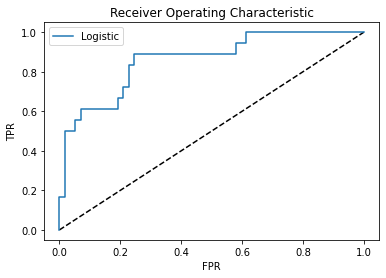

In [403]:
from sklearn.metrics import roc_curve
y_pred_prob1 = log_reg_remodel.predict(X_test)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)




#y_pred_prob2 = nn_model.predict(nn2_X)
#fpr2 , tpr2, thresholds2 = roc_curve(nn2_y, y_pred_prob2)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Logistic")

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()